In [115]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import glob
import os

# Load Data

In [116]:
path = 'data/csv_files'
files = glob.glob(os.path.join(path, '*.csv'))

li = []

for filename in files: 
    frame = pd.read_csv(filename, header=0)
    li.append(frame)

df = pd.concat(li, axis=0, ignore_index=True)
#df= pd.read_csv('data/out_test.csv')

C:\Users\hanna\AppData\Local\Temp/ipykernel_3792/1671890295.py:7: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  frame = pd.read_csv(filename, header=0)


In [117]:
df.head()

,id,lang,authors,title,subtitle,statement,place,publisher,year,editors,subjects,subject_types,parentId,parentTitle
0,BV000023649,ger,NaN,"Deutsches Literaturarchiv, Schiller-Nationalmu...",NaN,vorgestellt von den Mitarbeitern,Marbach a. Neckar,NaN,1982,NaN,Deutsches Literaturarchiv Marbach,b,BV040655651,Marbacher Schriften
1,BV000024214,ger,"Schlink, Wilhelm",Jacob Burckhardt und die Kunsterwartung im Vor...,NaN,Wilhelm Schlink,Wiesbaden,Steiner,1982,NaN,"Burckhardt, Jacob|Deutschland|Historienmalerei",p|g|s,BV000000154,Frankfurter historische Vorträge
2,BV000024767,ger,"Burckhardt, Jacob",Über das Studium der Geschichte,NaN,Jacob Burckhardt. Nach den Handschriften herau...,München,Verlag C.H.Beck,1982,"Ganz, Peter F.|Ziegler, Ernst","Geschichtsstudium|Burckhardt, Jacob",s|p,NaN,NaN
3,BV000025578,ger,"Herzog, Werner",Fitzcarraldo,NaN,Werner Herzog,München u.a.,Hanser,1982,NaN,"Fitzcarraldo|Herzog, Werner",u|p,NaN,NaN
4,BV000026429,ita,"Rotili, Mario",Filippo Raguzzini nel terzo centenario della n...,NaN,NaN,Napoli,Soc. Ed. Napoletana,1982,"Rauzzini, Filippo","Rauzzini, Filippo",p,BV000000758,Studi e testi di storia e critica dell'arte


# Data exploration and Cleaning

### Subject labels

The subject labels and types are saved as a string using '|' as seperator

In [118]:
# cleaning the subject types
df['subject_labels'] = df['subject_types'].str.split('|')


# cleaning up the subject: getting rid of commas and spaces, replacing the | with spaces
df['subject_list'] = df['subjects'].apply(lambda x: str(x).replace(',', '').replace(' ', '').replace('|', ' '))

### Publication year
The year column is very messy. I'm trying to extract only the year for each 

In order to extract only the year (which is hopefully present in all rows with a publication year entry), I'm trying a regex pattern match with 4 digits exactly

In [128]:
df.year.isna().sum()

5081

In [131]:
df['year_clean'] = df.year.str.extract(r'(\d{4})')

In [144]:
funny_years = df[df.year_clean.astype(float) > 2023]

In [147]:
funny_years

,id,lang,authors,title,subtitle,statement,place,publisher,year,editors,subjects,subject_types,parentId,parentTitle,subject_labels,subject_list,year_clean
161492,BV037722322,ita,NaN,Esattissima descrizione delle cerimonie fatte ...,NaN,NaN,Roma,Leone [u.a.],2689 [vielm. 1689],NaN,Alexander VIII. (Papst),p,NaN,NaN,[p],AlexanderVIII.(Papst),2689
945601,BV043420764,ger,NaN,Mediengeographie,NaN,"Jörg Döring, Tristan Thielmann",Baden-Baden,Nomos,2025,"Döring, Jörg|Thielmann, Tristan",Raumdaten,s,BV019411890,Medienumbrüche,[s],Raumdaten,2025
1014597,BV046111364,eng,NaN,Tailored treatments in psoriatic patients,NaN,edited by Shahin Aghaei,London,IntechOpen,July 2091,"Aghaei, Shahin",NaN,NaN,NaN,NaN,NaN,nan,2091
1015581,BV046164027,ger,"Bauer, Thomas",Hypothesen zur Spätgotischen Schlingrippenfigu...,NaN,"Thomas Bauer, Jörg Lauterbach",NaN,NaN,2919,"Lauterbach, Jörg","Julius (Würzburg, Bischof)|Neubaukirche|Schlin...",p|g|s,NaN,NaN,"[p, g, s]",Julius(WürzburgBischof) Neubaukirche Schlingri...,2919
1026263,BV046649735,ita,NaN,Da Giovanni Pisano ad Adolfo Wildt,NaN,redazione,NaN,NaN,2109,NaN,NaN,NaN,NaN,NaN,NaN,nan,2109
1028787,BV046728135,ita,"Terrinoni, Giorgia",Leggerezza e complessità nel lavoro di Mark Br...,NaN,di Giorgia Terrinoni (da una conversazione di ...,NaN,NaN,2107,NaN,NaN,NaN,NaN,NaN,NaN,nan,2107
1031431,BV046782311,ita,"Lo Presti, Aldo",Tra i quadri,NaN,Aldo Lo Presti,NaN,NaN,2035919,NaN,NaN,NaN,NaN,NaN,NaN,nan,2035


### Catalogue Info
- Acquisition date: before 2012 approx. the date of acquisition is in the 'Inventarnummer' field. It contains the year and the how manyth document it is in a given year (linear time information). After 2012 the date of acquisition is in the acquisition date field
- Volumes with parentid: Volumes of works have a parent entry in the bvb catalogue, all the children point to it in the parentid field. If the documents are present in the BH, the children have a shelf number, the parent document doesn't. Often neither contain subjects (as they are e.g. encyclopedias)


In [100]:
# drop documents without subject labels

df.dropna(subset=['subjects'], inplace=True)
df['subjects'].isna().sum()

0

In [92]:
# drop documents that belong to a Volume of works (with parentid)

#df[df.parentId.isna()]

,id,lang,authors,title,subtitle,statement,place,publisher,year,editors,subjects,subject_types,parentId,parentTitle
10,BV047615656,eng,Cunliffe-Jones,Misinformation Policy in Sub-Saharan Africa,NaN,"Peter Cunliffe-Jones, Assane Diagne, Alan Finl...",London,University of Westminster Press,2021,"Assane, Diagne|Finlay, Alan",Nachrichtensendung|Afrika,s|g,NaN,NaN
13,BV047615693,ita,NaN,Il mito di Venezia,NaN,catalogo a cura di Elisabetta Chiodini ; saggi...,Novara,METS Percorsi d'Arte,[2021],"Chiodini, Elisabetta|Capponi, Silvia|Mazzanti,...",Venedig|Malerei,g|s,NaN,NaN
25,BV047615901,ita,NaN,Contro frate Bernardino da Siena. Processi al ...,NaN,a cura di Marina Benedetti e Tiziana Danelli,Mailand,Milano University Press,2021,"Benedetti, Marina|Danelli, Tiziana",Bernardinus (Senensis)|Häresie,p|s,NaN,NaN
27,BV047615950,ita,"Farina, Tancredi",Pietro Paolo Olivieri e la celebrazione di Gre...,NaN,Tancredi Farina,NaN,NaN,2020,NaN,"Olivieri, Pietro Paolo|Plastik|Santa Maria in ...",p|s|g,NaN,NaN
31,BV047616054,fre,"Schwartz, Emmanuel",Présence de Winckelmann dans le musée des Monu...,NaN,Emmanuel Schwartz,NaN,NaN,2021,NaN,"Winckelmann, Johann Joachim|Rezeption|Frankreich",p|s|g,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113176,BV048536936,eng,"Gifford, E. Melanie",Vermeer's Studio and the Girl with a Flute,NaN,"E. Melanie Gifford, Dina Anchin, Alexandra Lib...",NaN,NaN,2022,"Anchin, Dina|Libby, Alexandra|Wieseman, Marjor...","Vermeer van Delft, Jan|Maltechnik",u|s,NaN,NaN
113179,BV048536958,eng,"Gifford, E. Melanie",Methodology & resources,NaN,"E. Melanie Gifford, Kathryn A. Dooley, John K....",NaN,NaN,2022,"Dooley, Kathryn A.|Delaney, John K.","Vermeer van Delft, Jan|Künstlerische Technik",u|s,NaN,NaN
113188,BV048537134,eng,"Lovra, Éva",Heritage patterns - representative models,NaN,editor: Éva Lovra,Basel ; Beijing ; Wuhan ; Barcelona ; Belgrade...,MDPI,[2022],NaN,Stadtforschung,s,NaN,NaN
113190,BV048537270,eng,NaN,Lipids in the ocean 2021,NaN,"editors Maria do Rosário Domingues, Philippe S...",Basel,MDPI,[2022],"Domingues, Maria do Rosário",Medizin,s,NaN,NaN


## Bag of words

In [105]:
vectorizer = CountVectorizer(min_df=5)
subject_doc_matrix = vectorizer.fit_transform(df.subject_list)

In [106]:
subject_doc_matrix

<616855x23338 sparse matrix of type '<class 'numpy.int64'>'
	with 1065901 stored elements in Compressed Sparse Row format>

### UMAP

In [107]:
import matplotlib.pyplot as plt
from umap.umap_ import UMAP
import umap.plot
from pointgrid import align_points_to_grid

In [108]:
reducer = UMAP(random_state=42, n_components = 2, metric='cosine')
#reducer = UMAP(random_state=42, n_components = 2, metric='hellinger')

# Using hellinger metric the points without neighbors are mapped to nan. 

map = reducer.fit(subject_doc_matrix)

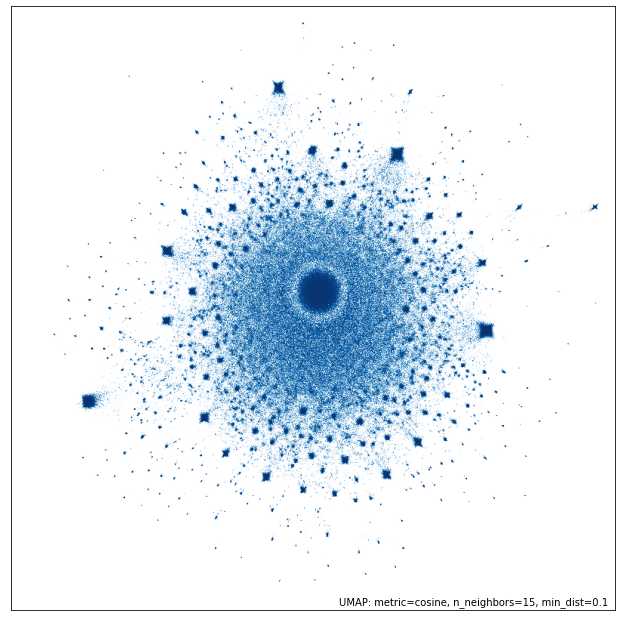

In [109]:
f = umap.plot.points(map)

In [110]:
map.embedding_

array([[ 0.20748378,  0.24793518],
       [-1.1134608 ,  0.09882991],
       [-1.7431842 ,  0.3541089 ],
       ...,
       [-0.5323751 , -3.9075732 ],
       [ 2.3217046 , -2.4134433 ],
       [-0.01783046, -0.07658894]], dtype=float32)

In [111]:
# Normalize 

embedding = map.embedding_ * 100 # Multiply by 100
embedding = align_points_to_grid(embedding)

# Swap axes for horizontal position

ptp = np.ptp(embedding, axis=0)
if ptp[1]> ptp[0]:
    embedding[:, [1, 0]] = embedding[:, [0, 1]]

# Set value starting from 0

embedding[:, 0] = embedding[:, 0] - embedding[:, 0].min()
embedding[:, 1] = embedding[:, 1] - embedding[:, 1].min()

# # Set origin at the middle

ptp = np.ptp(embedding, axis=0)  
embedding[:, 0] = embedding[:, 0] - ptp[0] / 2
embedding[:, 1] = embedding[:, 1] - ptp[1] / 2

embedding = embedding.astype(int) # Set integer

embedding

KeyboardInterrupt: 

# Cluster Identification

In [70]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, cluster_selection_method ='leaf')

clusterer.fit(embedding)
clusters = clusterer.labels_

values = set(clusters)
if -1 in values: values.remove(-1)

#clusters = [[index for index, cluster in enumerate(clusters) if cluster==value] for value in values]

len(clusters)


7302

In [82]:
df.groupby('cluster')['id'].count()


cluster
-1      3147
 0        32
 1        37
 2        44
 3        35
        ... 
 190      11
 191      13
 192      33
 193      26
 194      34
Name: id, Length: 196, dtype: int64

## Export 

In [72]:
# add coordinates to dataframe

df['embedding_x']  = embedding[:,0]
df['embedding_y']  = embedding[:,1]

# add cluster to dataframe

df['cluster'] = clusters

df.head()

,id,lang,authors,title,subtitle,statement,place,publisher,year,editors,subjects,subject_types,parentId,parentTitle,subject_labels,subject_list,embedding_x,embedding_y,cluster
0,BV000023649,ger,NaN,"Deutsches Literaturarchiv, Schiller-Nationalmu...",NaN,vorgestellt von den Mitarbeitern,Marbach a. Neckar,NaN,1982,NaN,Deutsches Literaturarchiv Marbach,b,BV040655651,Marbacher Schriften,[b],DeutschesLiteraturarchivMarbach,357,-124,192
1,BV000024214,ger,"Schlink, Wilhelm",Jacob Burckhardt und die Kunsterwartung im Vor...,NaN,Wilhelm Schlink,Wiesbaden,Steiner,1982,NaN,"Burckhardt, Jacob|Deutschland|Historienmalerei",p|g|s,BV000000154,Frankfurter historische Vorträge,"[p, g, s]",BurckhardtJacob Deutschland Historienmalerei,-187,-449,44
2,BV000024767,ger,"Burckhardt, Jacob",Über das Studium der Geschichte,NaN,Jacob Burckhardt. Nach den Handschriften herau...,München,Verlag C.H.Beck,1982,"Ganz, Peter F.|Ziegler, Ernst","Geschichtsstudium|Burckhardt, Jacob",s|p,NaN,NaN,"[s, p]",Geschichtsstudium BurckhardtJacob,131,-294,-1
3,BV000025578,ger,"Herzog, Werner",Fitzcarraldo,NaN,Werner Herzog,München u.a.,Hanser,1982,NaN,"Fitzcarraldo|Herzog, Werner",u|p,NaN,NaN,"[u, p]",Fitzcarraldo HerzogWerner,293,-120,169
4,BV000026429,ita,"Rotili, Mario",Filippo Raguzzini nel terzo centenario della n...,NaN,NaN,Napoli,Soc. Ed. Napoletana,1982,"Rauzzini, Filippo","Rauzzini, Filippo",p,BV000000758,Studi e testi di storia e critica dell'arte,[p],RauzziniFilippo,272,-230,-1


In [74]:
columns_export =['id', 'lang', 'title', 'year', 'embedding_x', 'embedding_y', 'cluster']

#path_out = 'data/mapping_out.csv'
path_out = 'data/mapping_out_all.csv'


df[columns_export].to_csv(path_out)

# Appendix

## TF-IDF

In [25]:
tfidf = TfidfVectorizer(min_df=5)
tfidf_subject_matrix = tfidf.fit_transform(df.subject_list)


In [26]:
tfidf_subject_matrix

<7302x429 sparse matrix of type '<class 'numpy.float64'>'
	with 7762 stored elements in Compressed Sparse Row format>

In [27]:
tfidf_embedding = UMAP(random_state=42, n_components = 2, metric='hellinger').fit(tfidf_subject_matrix)


c:\Users\hanna\anaconda3\envs\ada\lib\site-packages\umap\umap_.py:132: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = 1 has removed 25045 edges.
It has fully disconnected 1145 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


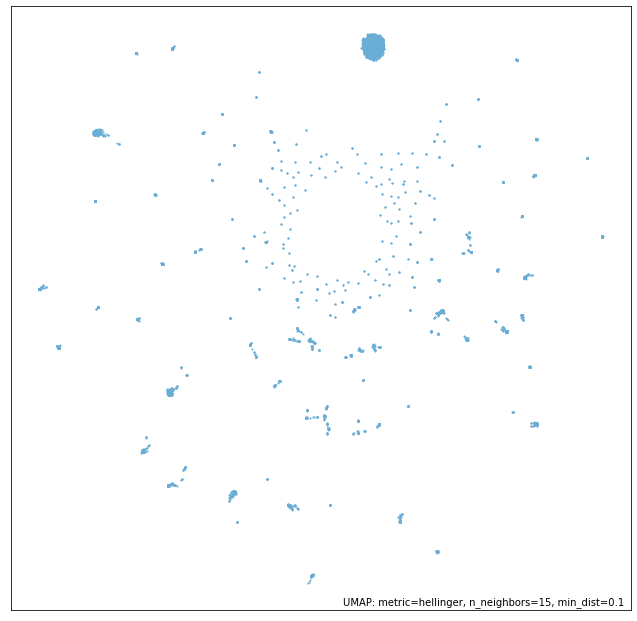

In [28]:
f = umap.plot.points(tfidf_embedding)